In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
#from sklearn.model_selection import KFold

In [2]:
x1 = np.load('../Data/tas_train.npy')
x2 = np.load('../Data/psl_train.npy')
y = np.load('../Data/nao_index_train.npy')

In [3]:
n_comp_pca = 50
pca = PCA(n_components=n_comp_pca)

In [4]:
pca.fit(np.transpose(x1))
x1_reduced = pca.transform(np.transpose(x1))
pc_x1 = pca.components_

In [5]:
np.transpose(x1).shape, pc_x1.shape

((2322, 900), (50, 900))

In [6]:
print(pca.explained_variance_ratio_.sum())

0.8828201904955115


In [7]:
pca.fit(np.transpose(x2))
x2_reduced = pca.transform(np.transpose(x2))
pc_x2 = pca.components_

In [8]:
print(pca.explained_variance_ratio_.sum())

0.9838981025628194


In [9]:
np.transpose(x2).shape, pc_x2.shape

((2322, 900), (50, 900))

In [10]:
# scale data
pc_x1_scaler = preprocessing.MinMaxScaler(feature_range=(-3, 3))
pc_x2_scaler = preprocessing.MinMaxScaler(feature_range=(-3, 3))
pc_x1 = (pc_x1_scaler.fit_transform(pc_x1))
pc_x2 = (pc_x2_scaler.fit_transform(pc_x2))

In [11]:
pc_x1.shape

(50, 900)

In [12]:
# get time dimension
D = x1.shape[0]
D

900

In [13]:
# define time data as index vector
X = np.array(range(0, D))
X = X.astype('float32')

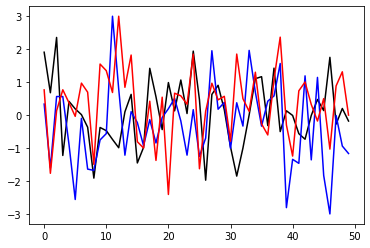

In [14]:
# plot data + principal component of first EOF
plt.plot(X[0:50],y[0:50], 'k')
plt.plot(X[0:50],pc_x1[0,0:50], '-b');
plt.plot(X[0:50],pc_x2[0,0:50], '-r');

In [16]:
# correlation of NAO vs. principal components
#np.array(y)
y_pc_x1 = np.concatenate([np.reshape(y,[900,1]),np.transpose(pc_x1)], axis=1)
y_pc_x2 = np.concatenate([np.reshape(y,[900,1]),np.transpose(pc_x2)], axis=1)
cc_1 = np.corrcoef(y_pc_x1, y=None, rowvar=False)
cc_2 = np.corrcoef(y_pc_x2, y=None, rowvar=False)
cc_1.shape

(51, 51)

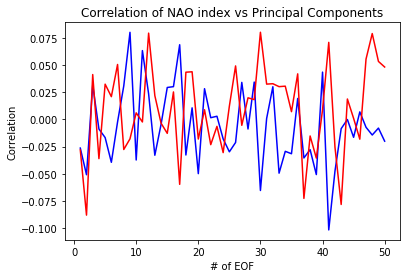

In [17]:
# plot correlations
X_pc = np.array(range(1, cc_1.shape[0]))
plt.plot(X_pc, cc_1[0,1:], 'b', label='NAO vs PC (tas)')
plt.plot(X_pc, cc_2[0,1:], 'r', label='NAO vs PC (slp)')
plt.title ('Correlation of NAO index vs Principal Components')
plt.xlabel ('# of EOF')
plt.ylabel ('Correlation')
plt.savefig('../Plots/correlation_NAO_vs_PCs.pdf')
